<a href="https://colab.research.google.com/github/Cyberszn/PODS-assesment/blob/main/3_PODS_Ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***LOADING THE DATASET***

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adverts = pd.read_csv('/content/drive/MyDrive/adverts.csv')

## ***MEANING AND TYPE OF FEATURES***
- I selected 3 features for observation which are mileage, year_of_registration and body_type

In [ ]:
adverts.head(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,21.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17.0,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol
6,202007080998445,24075.0,17.0,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
7,202009244143980,99000.0,13.0,Bronze,Land Rover,Range Rover,USED,2013.0,24475,SUV,False,Diesel
8,202010014442611,111236.0,8.0,Black,Mercedes-Benz,S Class,USED,2008.0,6995,Limousine,False,Diesel
9,202006230431327,9500.0,19.0,White,Land Rover,Range Rover,USED,2019.0,79995,SUV,False,Diesel


In [ ]:
adverts.sample(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
344995,202009043308460,7000.0,17,White,Nissan,Note,USED,2017.0,10495,Hatchback,False,Petrol
168926,202008192685823,96000.0,60,Blue,Nissan,Qashqai,USED,2010.0,4195,SUV,False,Petrol
301154,202007291850161,6254.0,19,Black,Audi,A3,USED,2019.0,24995,Saloon,False,Petrol
4453,202007301872766,6746.0,19,Black,Toyota,AYGO,USED,2019.0,9300,Hatchback,False,Petrol
260391,202010235348523,31600.0,17,Black,Audi,A4 Avant,USED,2017.0,17295,Estate,False,Diesel


In [ ]:
adverts.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [ ]:
adverts['mileage'].head(7)

0         0.0
1    108230.0
2      7800.0
3     45000.0
4     64000.0
5     16000.0
6     24075.0
Name: mileage, dtype: float64

In [ ]:
adverts['year_of_registration'].head(7)

0       NaN
1    2011.0
2    2017.0
3    2016.0
4    2015.0
5    2017.0
6    2017.0
Name: year_of_registration, dtype: float64

In [ ]:
adverts['body_type'].head(6)

0            SUV
1         Saloon
2            SUV
3      Hatchback
4            SUV
5    Convertible
Name: body_type, dtype: object

In [ ]:
pd.set_option('display.max_rows', None)
adverts['standard_make'].value_counts()

BMW                           37376
Audi                          35280
Volkswagen                    34246
Vauxhall                      33700
Mercedes-Benz                 31917
Nissan                        19892
Toyota                        17671
Peugeot                       15161
Land Rover                    14795
Renault                       12821
SKODA                         12276
Kia                           12241
Volvo                         11478
MINI                          11345
Hyundai                       11229
Citroen                       10503
Fiat                          10132
SEAT                           9660
Honda                          9405
Jaguar                         7534
Mazda                          6858
Suzuki                         4971
Porsche                        4320
Dacia                          3538
Mitsubishi                     3469
Lexus                          2914
Jeep                           1947
Alfa Romeo                  

## ***ANALYSIS OF DISTRIBUTION***

In [ ]:
ADV = adverts.sample(100000)
filadverts = ADV[ADV['year_of_registration'] >= 1900]

<Axes: xlabel='year_of_registration', ylabel='Frequency'>

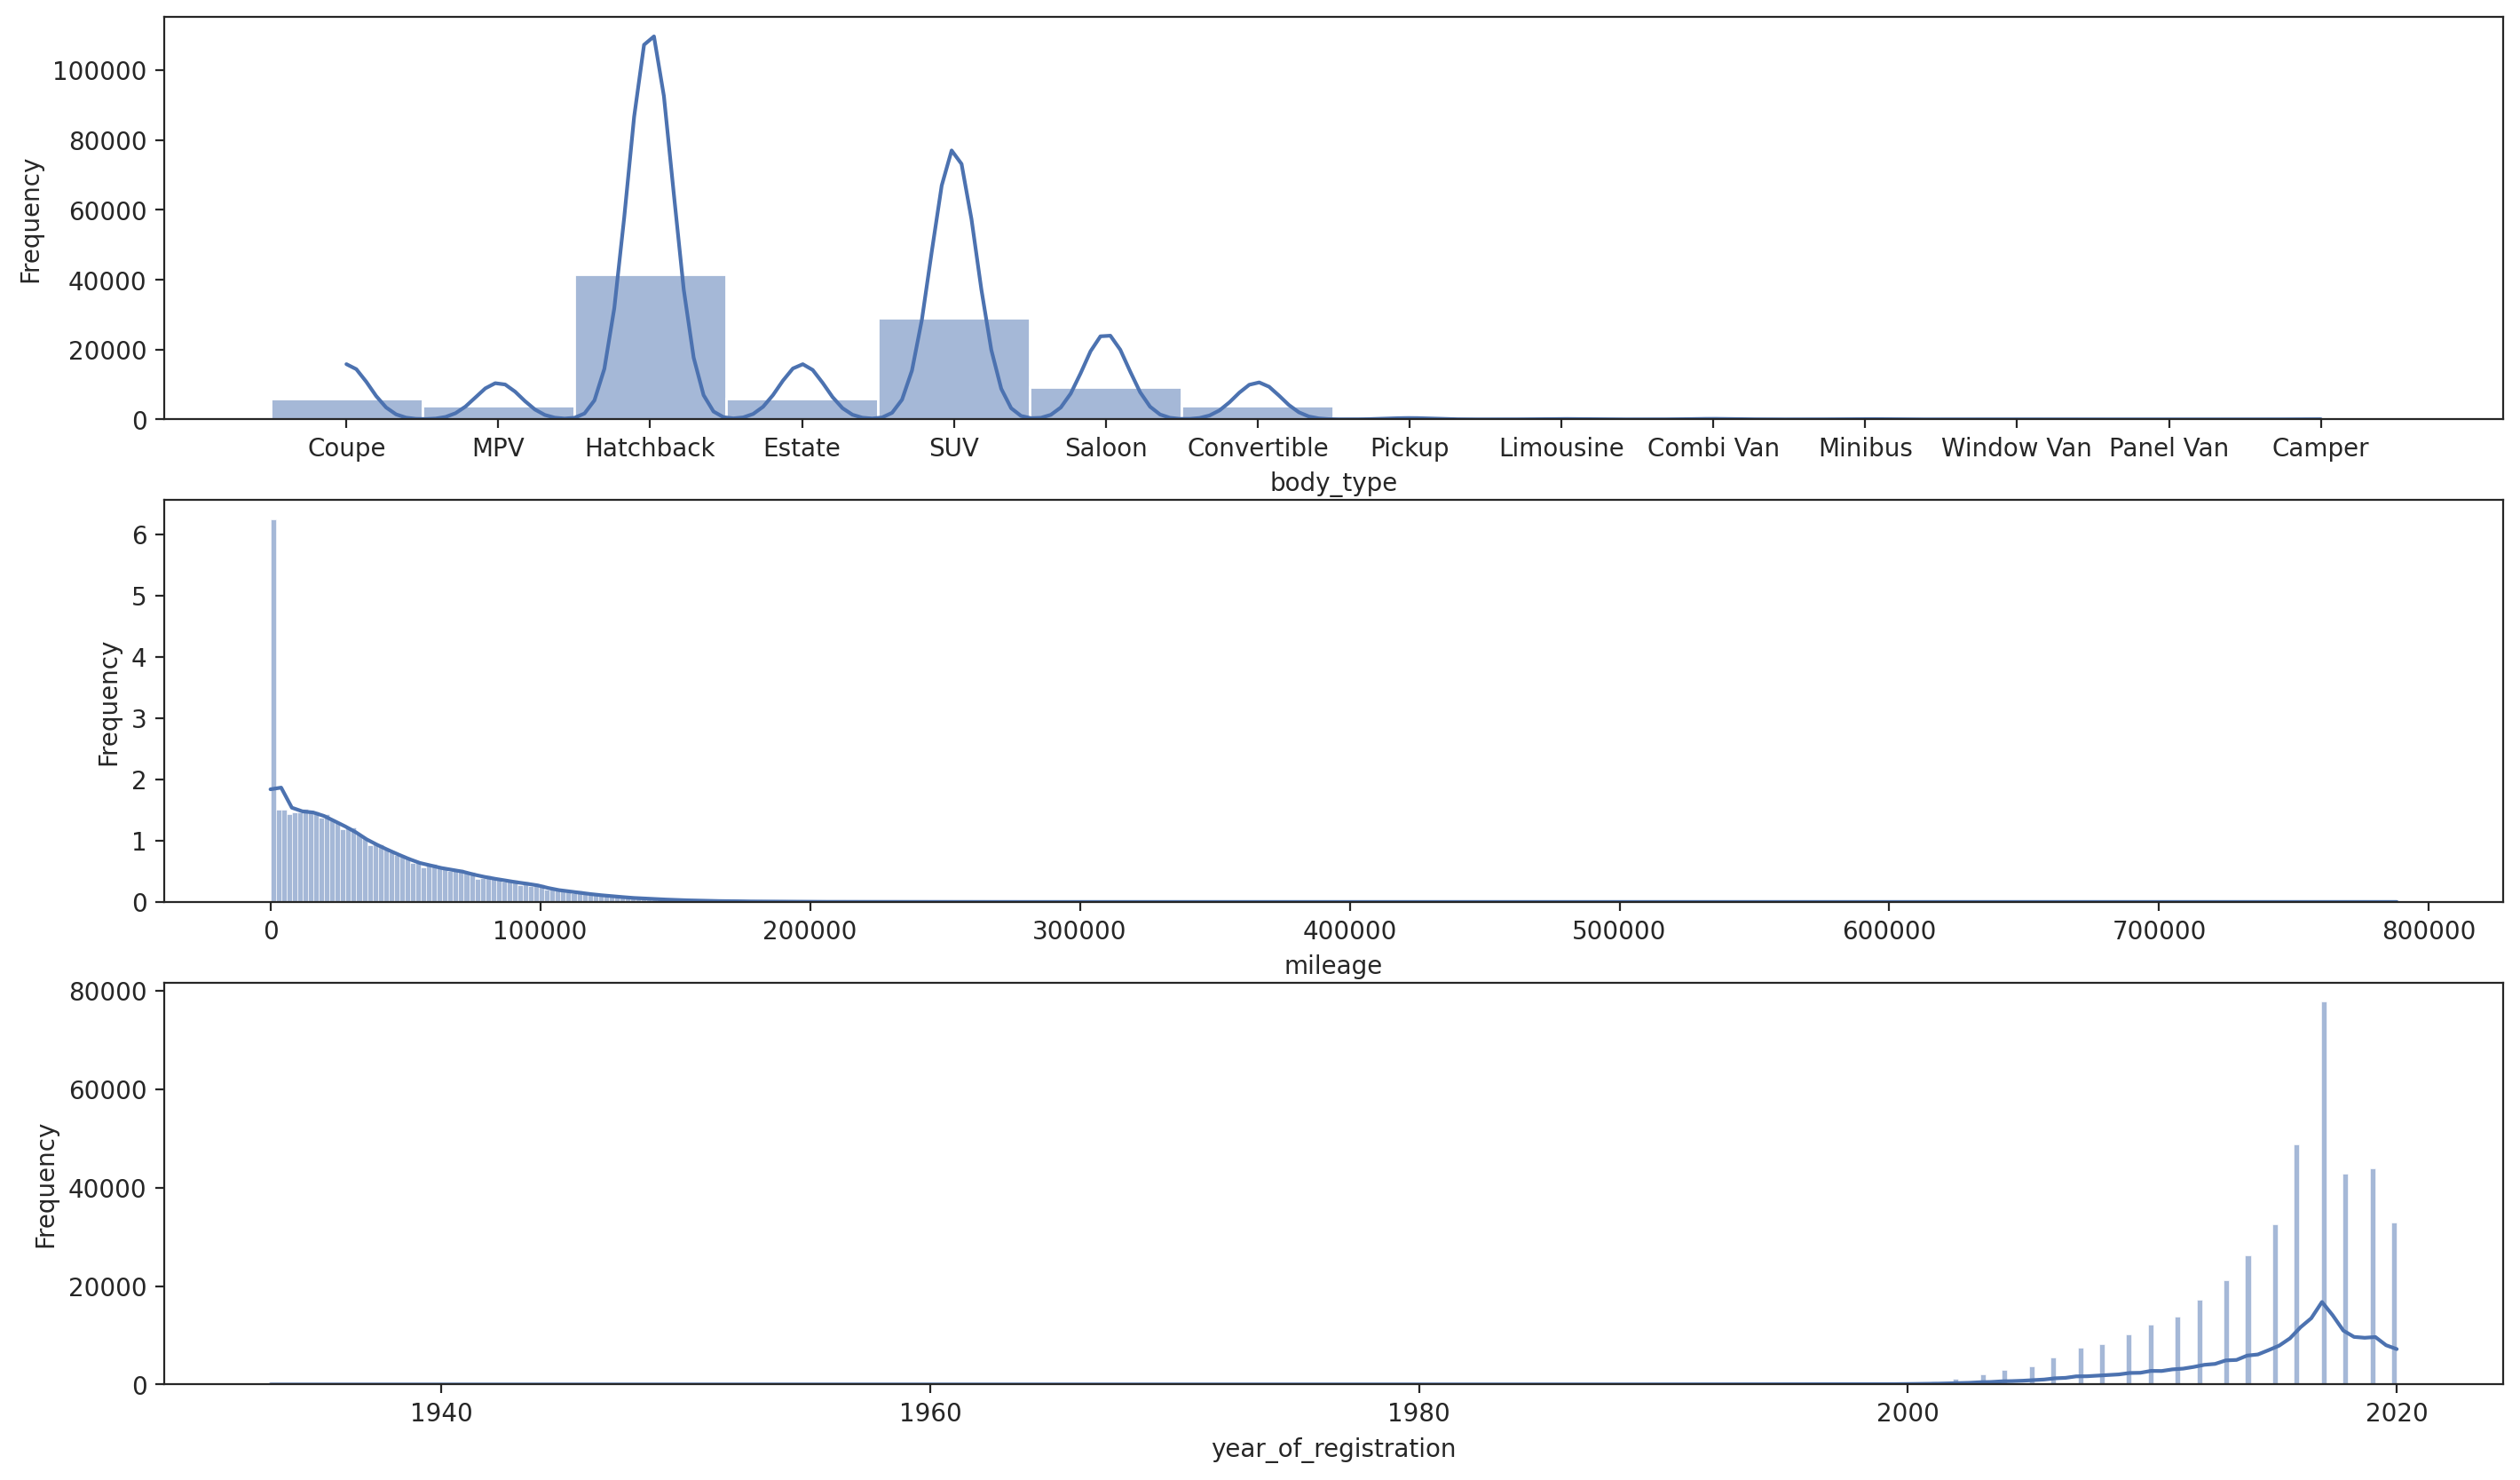

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(17, 10))

sns.histplot(data=ADV, x='body_type', stat='frequency', kde=True, ax=axes[0])
#axes[0].set_title('HIST FOR ADV3')
sns.histplot(data=ADV, x='mileage', stat='frequency', kde=True, ax=axes[1])
#axes[1].set_title('HIST FOR ADV2')
sns.histplot(data=filadverts, x='year_of_registration', stat='frequency', kde=True, ax=axes[2])
#axes[2].set_title('HIST FOR ADV')

<Axes: xlabel='body_type', ylabel='Frequency'>

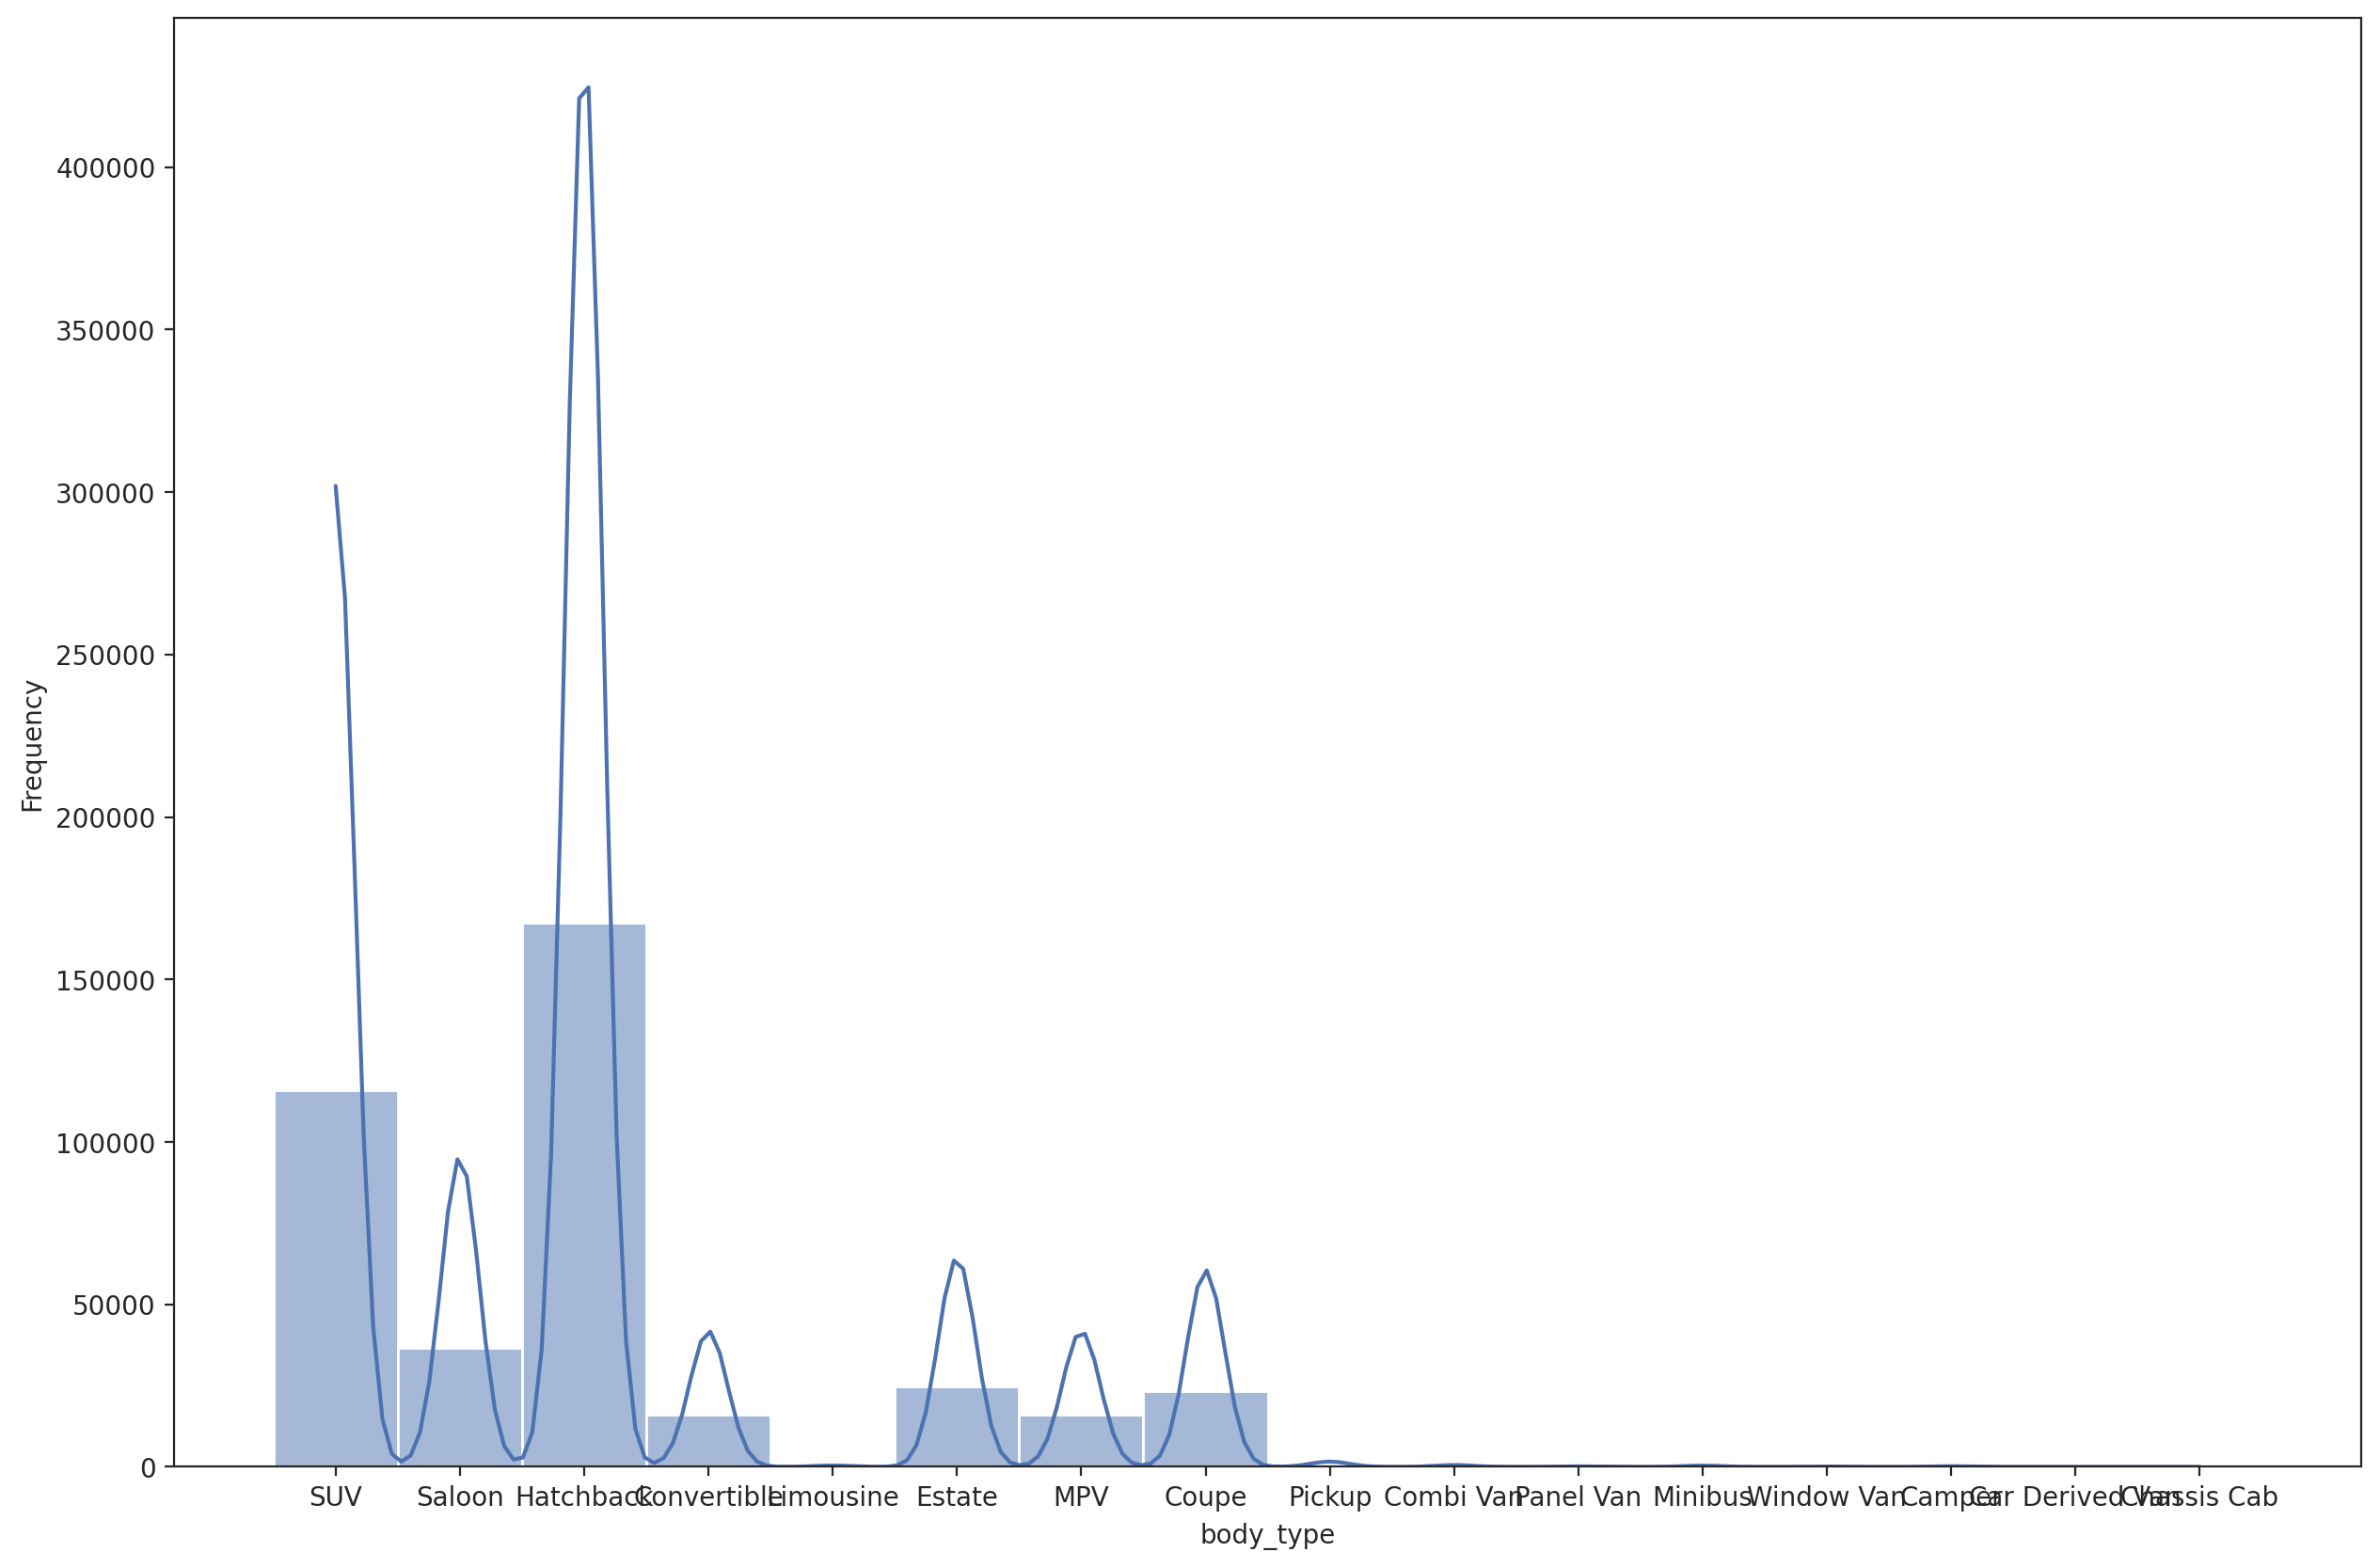

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=adverts, x='body_type', stat='frequency', kde=True)

<Axes: xlabel='year_of_registration', ylabel='Frequency'>

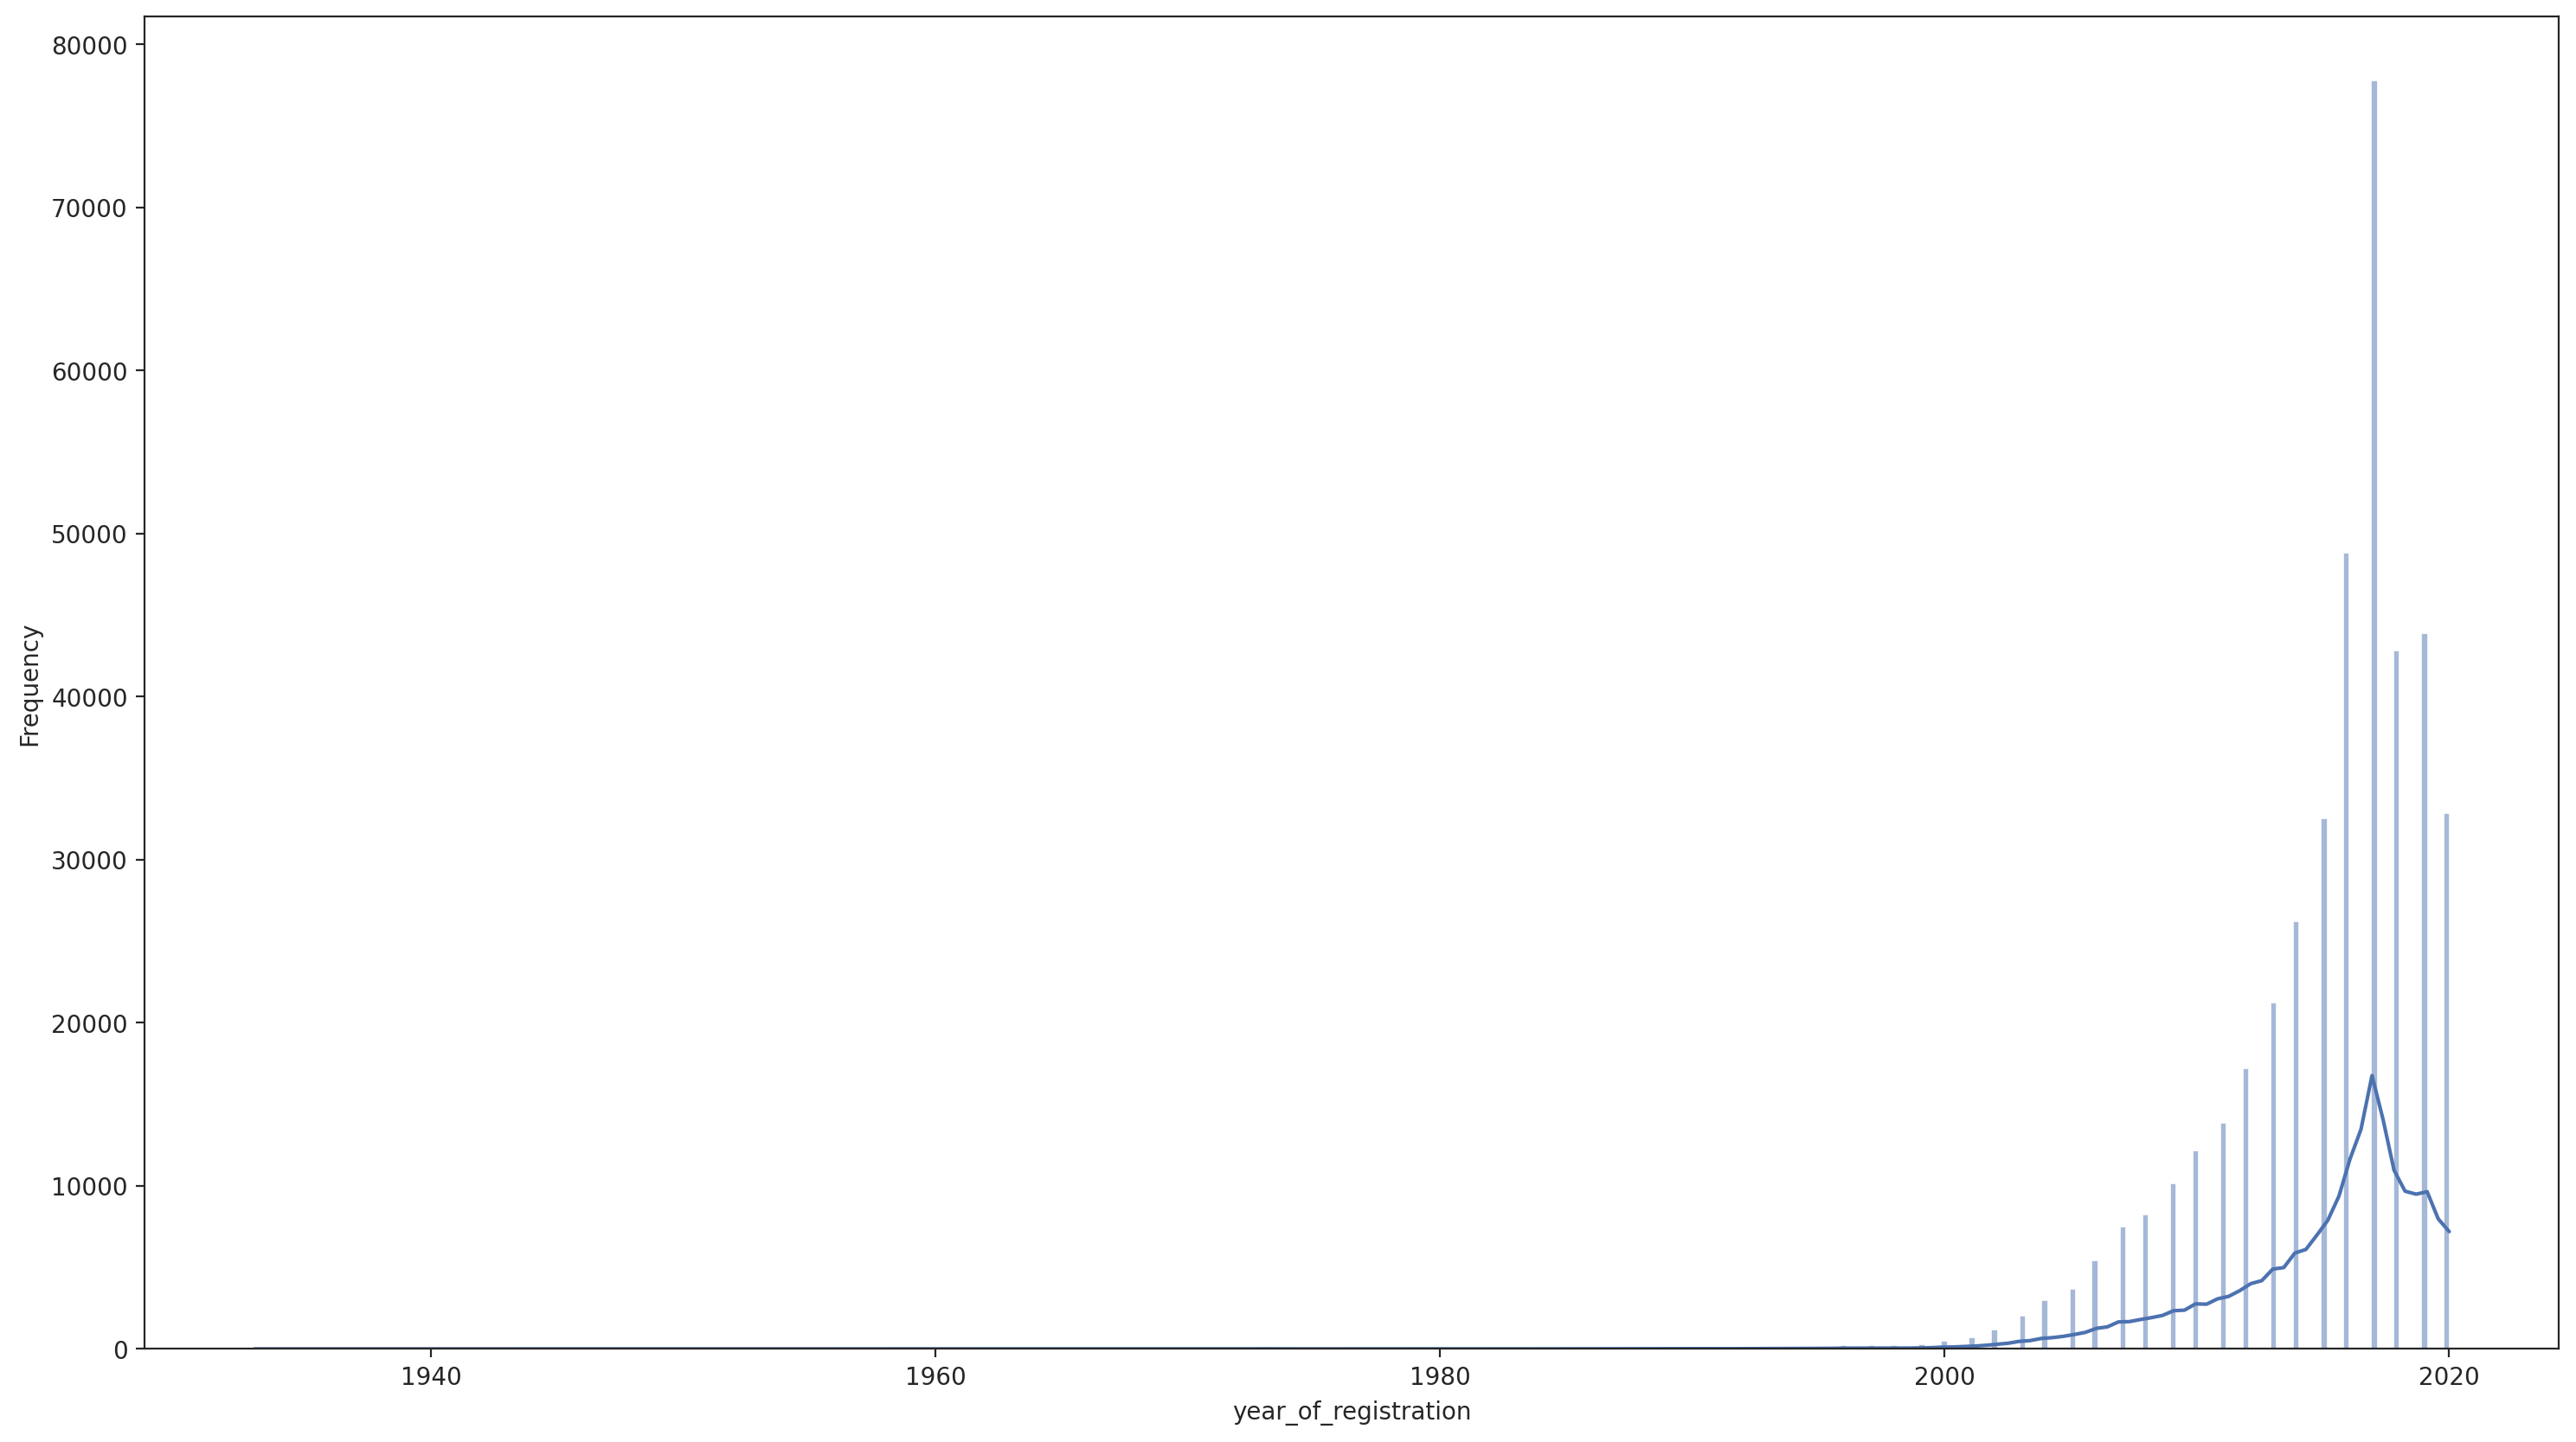

In [ ]:
plt.figure(figsize=(18, 10))
sns.histplot(data=filadverts, x='year_of_registration', stat='frequency', kde=True)

<Axes: xlabel='mileage', ylabel='Frequency'>

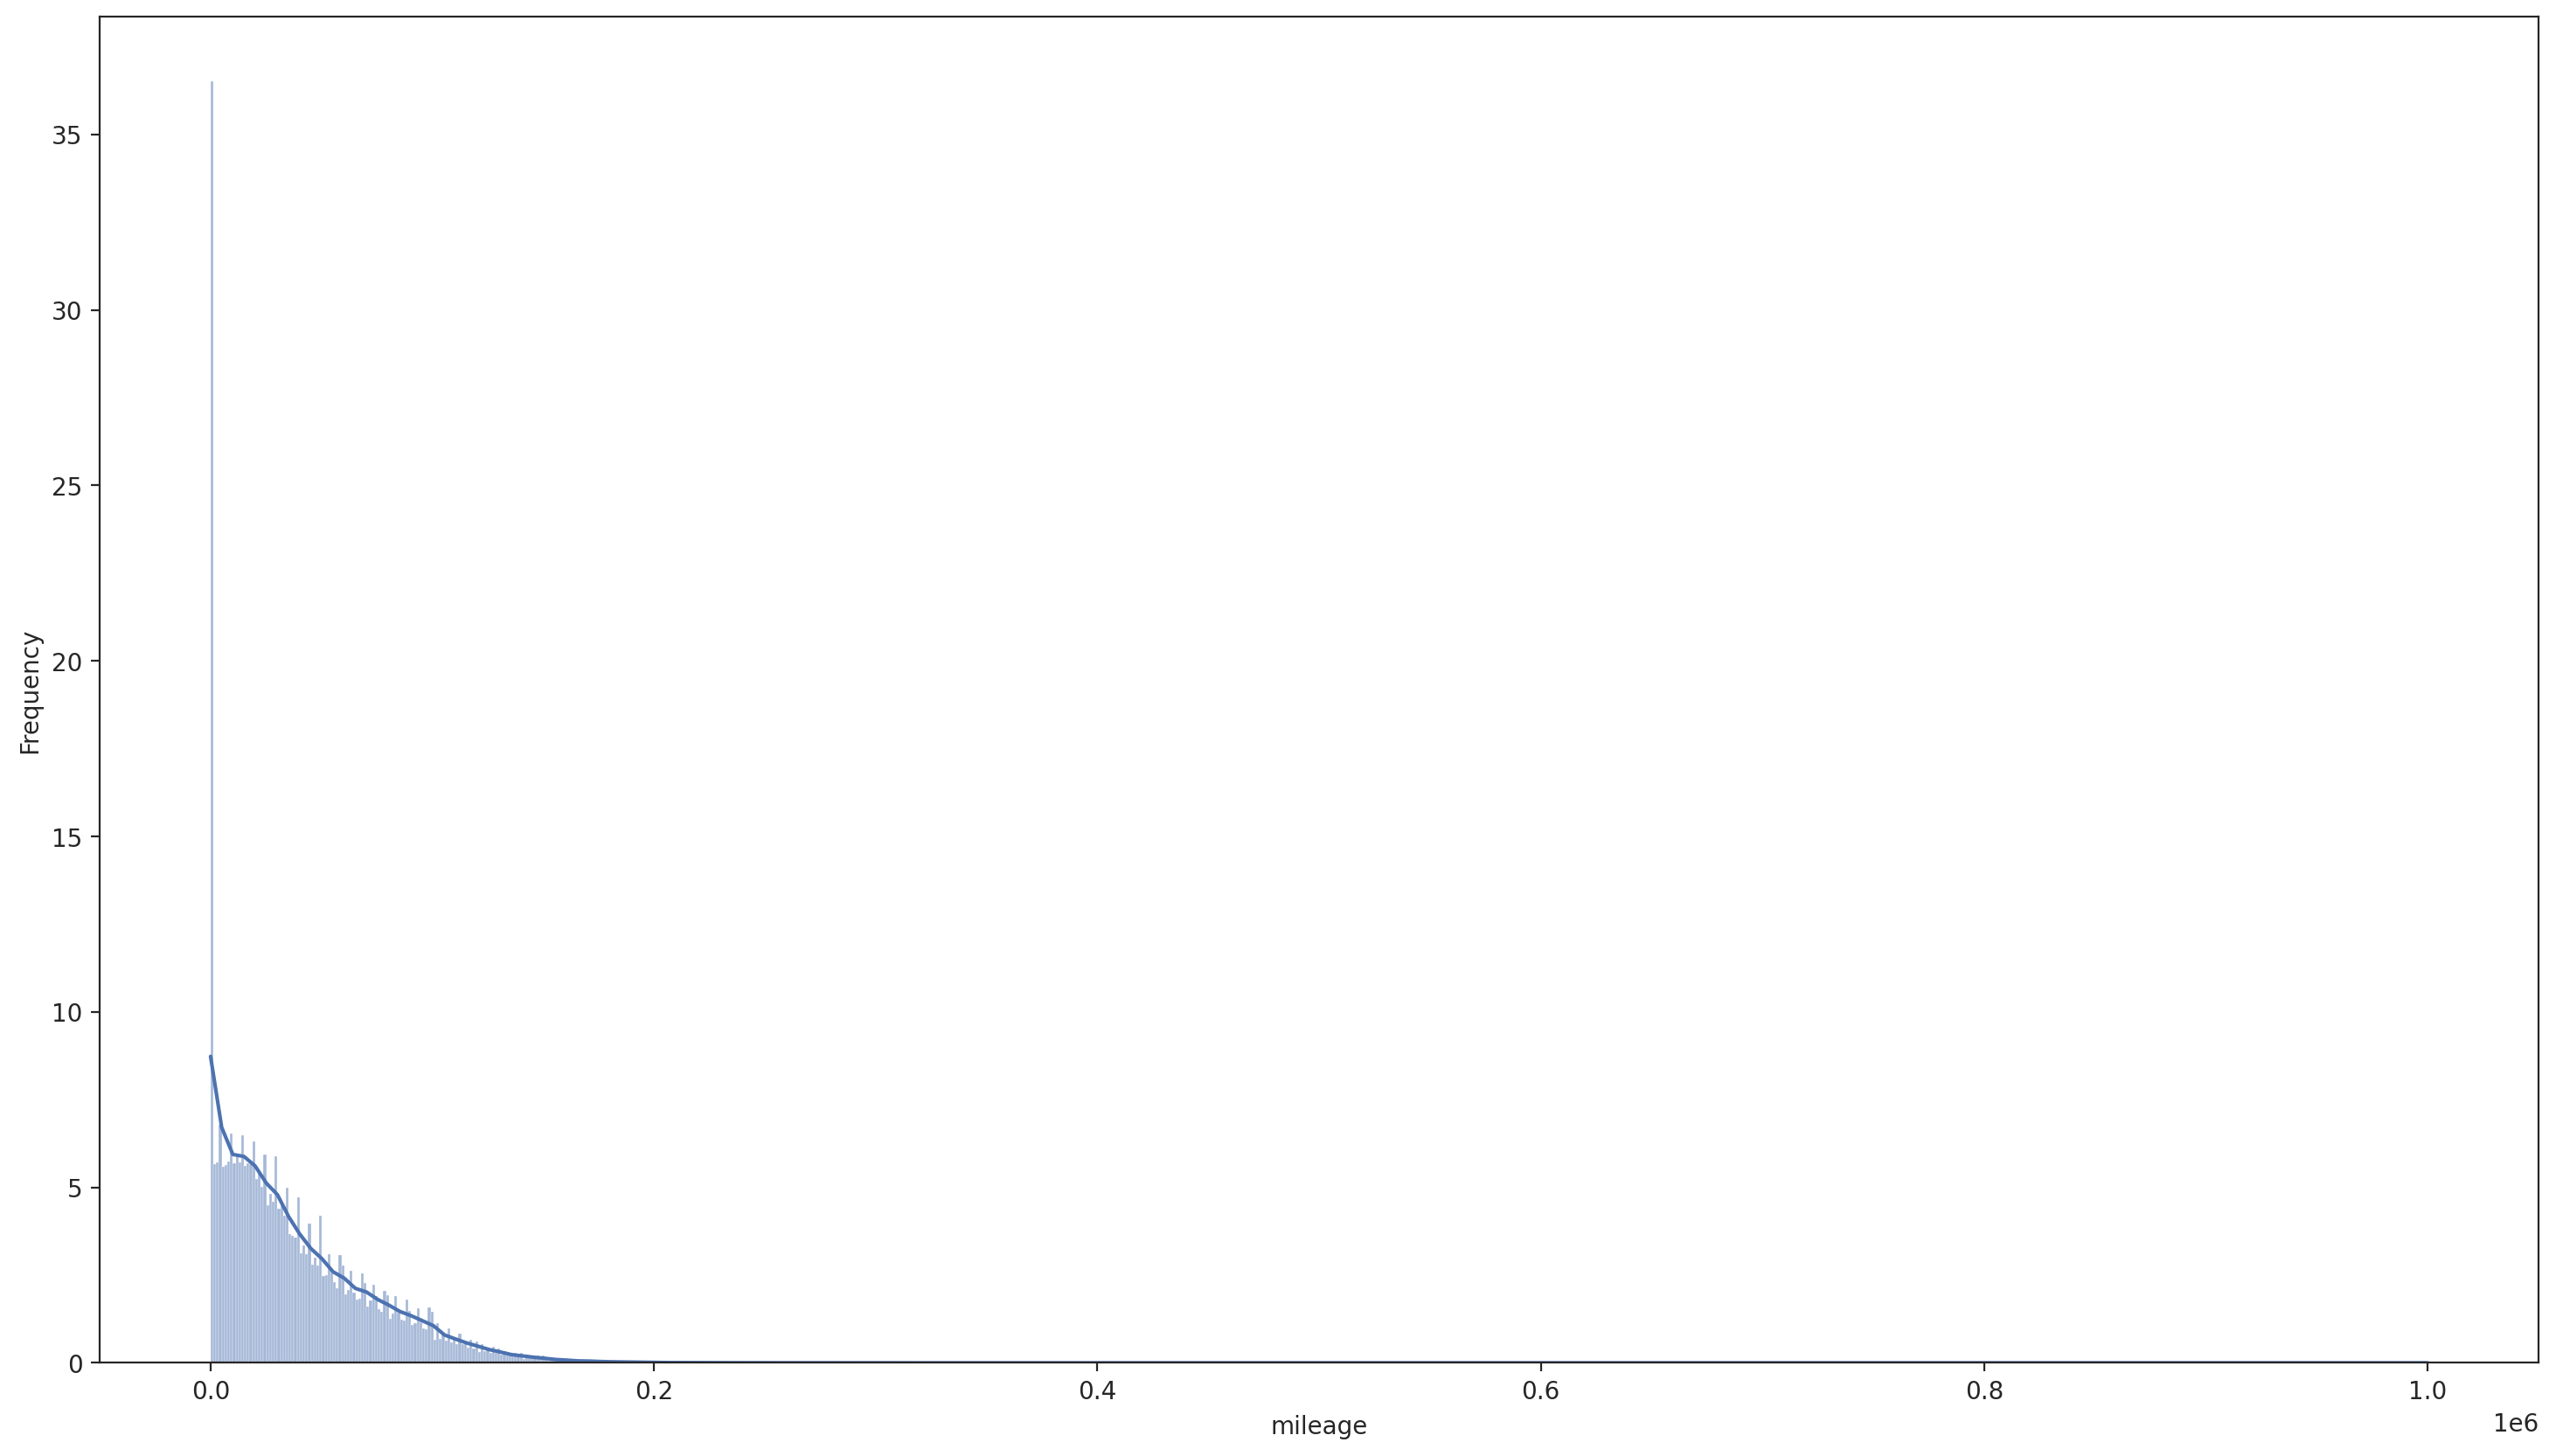

In [ ]:
plt.figure(figsize=(18, 10))
sns.histplot(data=adverts, x='mileage', stat='frequency', kde=True)

## ***Data Cleaning (e.g., dealing with incorrect values, outliers)***
- Filling in the missing values
- dropping columns that are not needed
- from the isnull.sum, we can see that Reg code and year of registration got the highest number of missing values, standard_colour would be dropped because it's not significant in determining the price.

In [ ]:
adverts.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [ ]:
new_ads = adverts

In [ ]:
new_ads.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


If you query the data set for the latest year, using adverts.[year_of_registrationmode].max it shows the modal year as 2020. so I decided to fill the missing values with 2021

In [ ]:
new_ads["year_of_registration"].max()

2020.0

In [ ]:
(
    new_ads
    .query("year_of_registration==2021")
    .sort_values('price', ascending=False)
    .head(5)
)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type


In [ ]:
#Converting the values on the reg_code column to numeric
new_ads['reg_code'] = pd.to_numeric(new_ads['reg_code'], errors= 'coerce')
#Getting all the rows where vehicle condition column = NEW
new_ads.loc[(new_ads['vehicle_condition'] == 'NEW' ) &
            (new_ads['reg_code'].isnull()), 'reg_code'] = 21
new_ads['year_of_registration'] = pd.to_numeric(new_ads['year_of_registration'], errors= 'coerce')
new_ads.loc[(new_ads['vehicle_condition'] == 'NEW' ) &
            (new_ads['year_of_registration'].isnull()), 'year_of_registration'] = 2021.0


In [ ]:
new_ads.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,21.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


***Handling data outliers for price***

In [ ]:
Price1 = new_ads['price'].quantile(0.25)
Price2 = new_ads['price'].quantile(0.75)

In [ ]:
#interquantile range
IQR = Price1 - Price2

In [ ]:
low_brac = Price1 - 1.5 * IQR
high_brac = Price2 + 1.5 * IQR

In [ ]:
outliers = new_ads[(new_ads['price']<low_brac) | (new_ads['price']>high_brac)]


In [ ]:
outliers_mask = (new_ads['price'] < low_brac) | (new_ads['price'] > high_brac)

In [ ]:
no_outliers = new_ads[~outliers_mask]

In [ ]:
no_outliers

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type


***Handling data outliers for Mileage***

In [ ]:
Mil1 = new_ads['mileage'].quantile(0.25)
Mil2 = new_ads['mileage'].quantile(0.75)

In [ ]:
#interquantile range
IQR1 = Mil1 - Mil2

In [ ]:
low_brac1 = Price1 - 1.5 * IQR1
high_brac1 = Price2 + 1.5 * IQR1

In [ ]:
outliers = new_ads[(new_ads['mileage']<low_brac1) | (new_ads['mileage']>high_brac1)]

In [ ]:
outliers_mask1 = (new_ads['mileage'] < low_brac1) | (new_ads['mileage'] > high_brac1)

In [ ]:
no_outliers1 = new_ads[~outliers_mask1]

In [ ]:
no_outliers1.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
4766,202003238706011,NaN,NaN,Grey,Subaru,Outback,USED,NaN,35995,Estate,False,Petrol
9178,202010084771255,NaN,20.0,Blue,BMW,3 Series,USED,2020.0,36990,Saloon,False,Diesel Hybrid
11188,202009284304657,NaN,9.0,Red,Citroen,C1,USED,2009.0,2699,Hatchback,False,Petrol
17166,202009264233189,NaN,15.0,Silver,Audi,A5 Cabriolet,USED,2015.0,13495,Convertible,False,Petrol
17416,202008192672386,NaN,NaN,Grey,SKODA,Octavia,USED,NaN,25085,Estate,False,Petrol


In [ ]:
new_ads0 = new_ads.dropna()

In [ ]:
new_ads.isnull().sum()

public_reference            0
mileage                   127
reg_code                 3523
standard_colour          5378
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     2062
price                       0
body_type                 837
crossover_car_and_van       0
fuel_type                 601
dtype: int64

In [ ]:
new_ads0.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

## ***Feature Engineering (e.g., deriving informative features)***

In [ ]:
new_ads0[['price', 'standard_colour']]

Columns to drop include Standard_colour, public_reference, crossover_car_and_van.
I will be dropping registration code because it has no direct correlation with price and can be replaced with year of registration.

In [ ]:
dropcolumn= ['standard_colour', 'reg_code', 'public_reference', 'crossover_car_and_van']

In [ ]:
new_ads1 = new_ads0.drop(columns=dropcolumn )

In [ ]:
plt.figure(figsize=(13, 4))
sns.scatterplot(data=new_ads0, x='standard_colour', y='price')
#plt.ylim(35, plt.ylim()[1])

In [ ]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=new_ads0, x='reg_code', y='price')
#plt.ylim(35, plt.ylim()[1])

We will be dropping Vehicle condition because it has no direct correlation with price.

In [ ]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=new_ads0, x='vehicle_condition', y='price')
#plt.ylim(35, plt.ylim()[1])

Creating A New Feature called the Car_year, we use 2021 as the current year.

In [ ]:
Recent_yr = 2021

In [ ]:
new_ads1['car_year'] = Recent_yr - new_ads1['year_of_registration']

In [ ]:
new_ads1['car_year']

Creating A New Feature called the Car_make, we combine the standard_make and standard_model as the car_make

In [ ]:
new_ads1['car_make'] = new_ads1['standard_make'] +" "+ new_ads1['standard_model']

In [ ]:
new_ads1['car_make']

In [ ]:
#plt.figure(figsize=(8, 7))
#sns.scatterplot(data=new_ads1, x='price', y='car_year')
#plt.ylim(35, plt.ylim()[1])


Categorical Encoding using OnehotEncoder

In [ ]:
new_ads1.tail()

In [ ]:
new_ads1['year_of_registration'].max()

In [ ]:
Onehot = pd.get_dummies(['body_type', 'fuel_type', 'car_make'])

In [ ]:
Onehot

In [ ]:
new_ads1.dtypes

Categorical encoding using ordinal encoding

In [ ]:
vc = {'USED': 0, 'New': 1}

In [ ]:
new_ads1['vc'] = new_ads1['vehicle_condition'].map(vc)

In [ ]:
new_ads1.head(1)

## ***Subsetting (e.g., feature selection and row sampling)***
- I will use numerical features like the Mileage and Price
- I also did the sampling by taking a subset of standard make like Hyundai and BMW to see their price distribution
- I am also taking the subset of mileage both low mileage and high mileage to compare with price

feature selection and row sampling based on car makes, using Hyundai and BMW

In [ ]:
selfeat = ['car_year', 'mileage', 'vehicle_condition', 'body_type']

In [ ]:
subset = new_ads1[selfeat]

In [ ]:
subset.head()

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.hist(new_ads0[new_ads0["standard_make"] == "Hyundai"]["price"], bins=20, edgecolor="black")
plt.title("Hyundai Price Distribution")
plt.subplot(1, 2, 2)
plt.hist(new_ads0[new_ads0["standard_make"] == "BMW"]["price"], bins=20, edgecolor="black")
plt.title("Hyundai and BMW Price Distribution")


In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot([adverts[adverts["standard_make"] == "Hyundai"]["price"],
             adverts[adverts["standard_make"] == "BMW"]["price"],
             adverts[adverts["standard_make"] == "SKODA"]["price"],
             adverts[adverts["standard_make"] == "Audi"]["price"],
             ],
            labels=["Hyundai", "BMW", "SKODA", "Audi"])
plt.title("Price Distribution by Standard Make")
plt.ylabel("Price")

In [ ]:

grp1 = new_ads1.groupby('standard_make')['price'].describe()
grp1.head()

In [ ]:
# I will set my high mileage 300,000 as and low mileage 5000 according to domain knowledge

newgrp = new_ads1.groupby('standard_make')['mileage'].describe()
newgrp.head()


In [ ]:
newbox = new_ads0[new_ads0['price'] <= 100000]
high_mile = newbox[newbox['mileage'] >= 90000]

low_mile = newbox[newbox['mileage'] <= 20000]

high_mile_price = high_mile['price']
low_mile_price = low_mile['price']


In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([high_mile['price'], low_mile['price']],
           labels=['High Mileage', 'Low Mileage'],
           notch=True)
plt.title("Price Distribution by Mileage Group")
plt.ylabel("Price")


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(high_mile['mileage'], high_mile['price'], label='High Mileage', alpha=0.7)
plt.scatter(low_mile['mileage'], low_mile['price'], label='Low Mileage', alpha=0.7)
plt.title("Price vs. Mileage for High and Low Mileage Groups")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend()



## ***Analysis of Associations and Group Differences***

**QUANTITATIVE - QUANTITATIVE**

***PEARSON CORRELATION***

In [ ]:
# Pearson correlation for mileage and price
correl = new_ads1["mileage"].corr(new_ads1["price"])
correl

Checking relationship of price with a new feature car_year also checking the prices of cars from the last 20 years

In [ ]:
subcar = new_ads1[(new_ad1['year_of_registration'] < 2000.0)]
plt.figure(figsize=(12, 5))
sns.barplot(x='year_of_registration', y='price', data=subcar)
plt.title('Price Distribution Vs Car Year')

advs = new_ads1[(new_ads1['mileage'] <= 10000)]
plt.figure(figsize=(12, 5))
plt.heatmap("mileage"], advs["price"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs. Mileage")


***QUANTITATIVE - CATEGORICAL***

Text(0.5, 1.0, 'BMW Price Distribution')

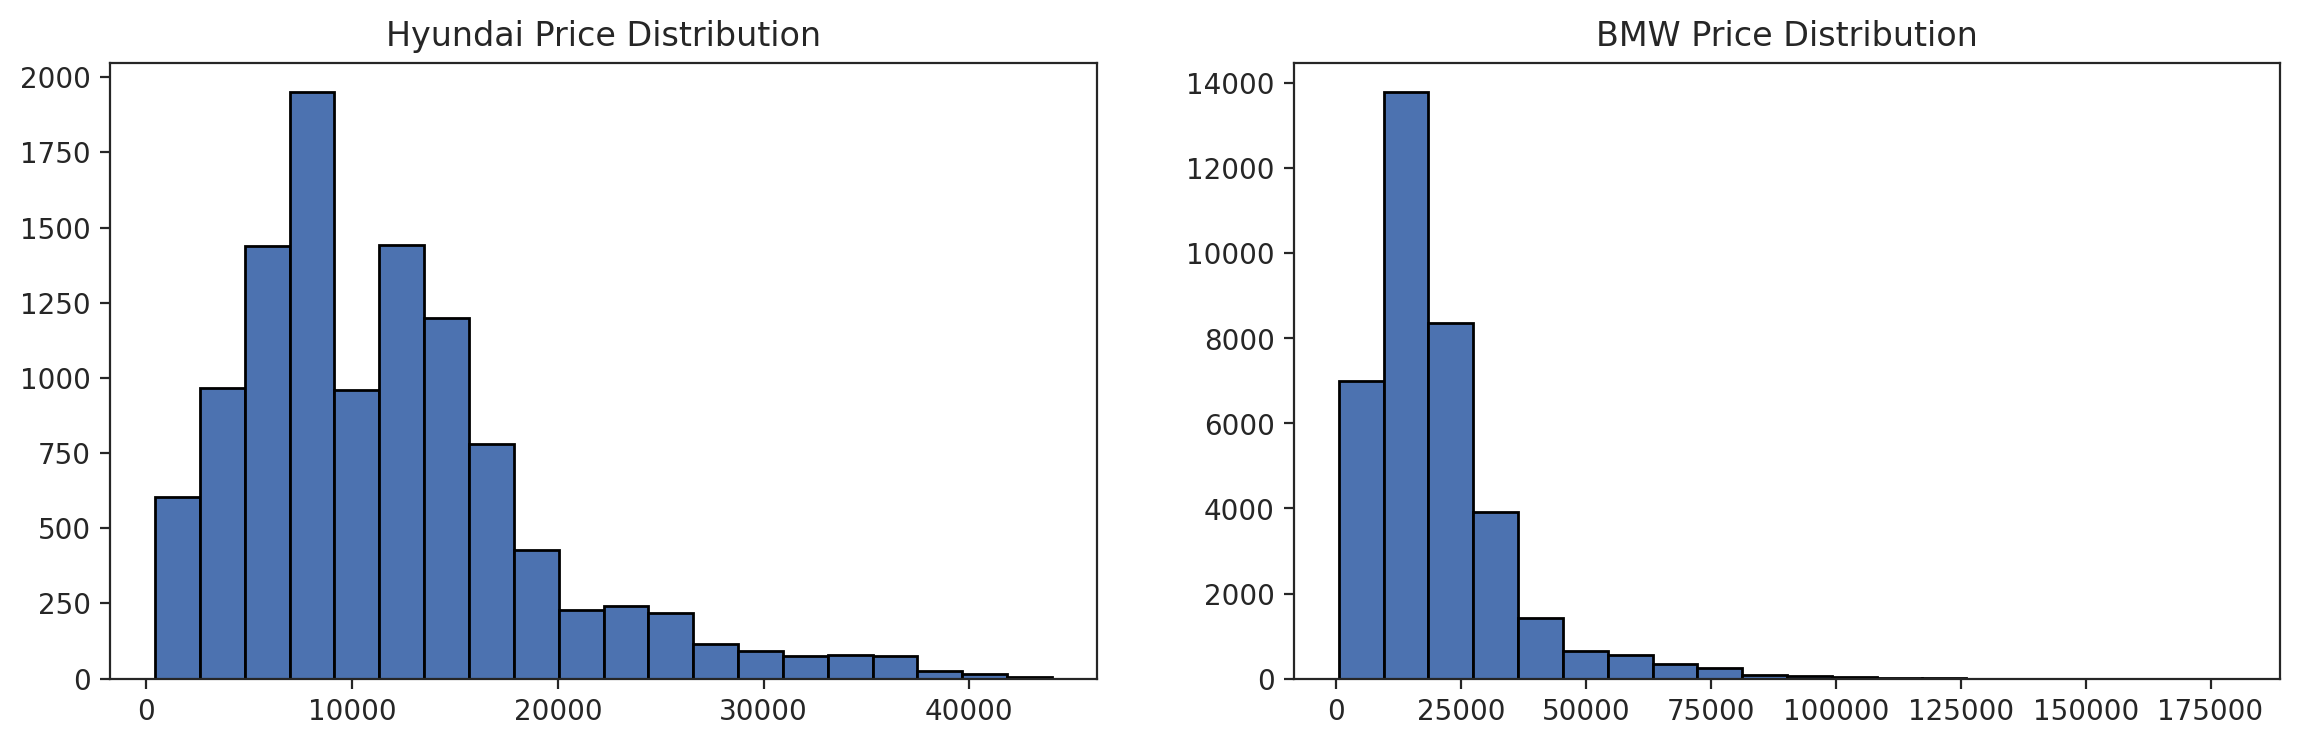

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.hist(new_ads1[new_ads1["standard_make"] == "Hyundai"]["price"], bins=20, edgecolor="black")
plt.title("Hyundai Price Distribution")
plt.subplot(1, 2, 2)
plt.hist(new_ads1[new_ads1["standard_make"] == "BMW"]["price"], bins=20, edgecolor="black")
plt.title("BMW Price Distribution")


In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='body_type', y='price', data=new_ads1)
plt.xticks(rotation=100)

In [ ]:
sumads = new_ads1[(new_ads1['price'] < 100000.0)]
plt.figure(figsize=(12, 10))
sns.boxplot(x='body_type', y='price', data=sumads)
plt.xticks(rotation=50)

In [ ]:
new_ads1.isnull().sum()

In [ ]:
new_ads1.head()

***CATEGORICAL - CATEGORICAL***

**BODY_TYPE AND VEHICLE CONDITION**

In [ ]:
pivot_table0 = new_ads1.pivot_table(values="price", index=["body_type", "vehicle_condition"], aggfunc="mean")
pivot_table0

In [ ]:
pivot_table0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pivot_table01 = new_ads1.pivot_table(values="price", index=["body_type", "vehicle_condition"], aggfunc="median")
pivot_table01

In [ ]:
_df_4['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pivot_table011 = new_ads1.pivot_table(values="price", index=["body_type", "vehicle_condition"], aggfunc="max")
pivot_table011

In [ ]:
_df_8['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

***BODY TYPE AND FUEL TYPE ***

In [ ]:
pivot_table = new_ads1.pivot_table(values="price", index=["body_type", "fuel_type"], aggfunc="mean")
pivot_table

In [ ]:
_df_12['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pivot_table1 = new_ads1.pivot_table(values="price", index=["body_type", "fuel_type"], aggfunc="median")
pivot_table1

In [ ]:
_df_14['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pivot_table2 = new_ads1.pivot_table(values="price", index=["body_type", "fuel_type"], aggfunc="max")
pivot_table2

In [ ]:
_df_16['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

***FUEL TYPE AND STANDARD MAKE***

In [ ]:
pivot_table20 = new_ads1.pivot_table(values="price", index=["fuel_type", "standard_make"], aggfunc="max")
pivot_table20

price
fuel_type             standard_make                      
Bi Fuel               Bentley                       69995
                      Dacia                         16855
                      Honda                         10000
                      Mitsubishi                     1475
                      Proton                         1300
                      Saab                           4500
                      Subaru                         4495
                      Toyota                         6999
                      Vauxhall                        695
                      Volvo                          2295
Diesel                Aixam                          6300
                      Alfa Romeo                    52185
                      Audi                         101430
                      BMW                          117400
                      Bentley                      154995
                      Cadillac                       4000
                      Chevrolet                     10995
                      Chrysler                      14495
                      Citroen                       33068
                      DS AUTOMOBILES                40990
                      Dacia                         18875
                      Dodge                          6950
                      Fiat                          60000
                      Great Wall                    11995
                      Honda                         27724
                      Hyundai                       44010
                      Infiniti                      21000
                      Isuzu                         39995
                      Iveco                         25599
                      Jaguar                        59763
                      Jeep                          51740
                      Kia                           41895
                      Land Rover                   179500
                      Lexus                          7990
                      London Taxis International    99000
                      MG                            10450
                      MINI                          27550
                      Maserati                      69950
                      Mazda                         39465
                      Mercedes-Benz               1000000
                      Mitsubishi                    38118
                      Nissan                        33215
                      Peugeot                       39435
                      Porsche                       84950
                      Renault                       35529
                      Rover                          3750
                      SEAT                          40175
                      SKODA                         49750
                      Saab                          10500
                      Smart                          4995
                      SsangYong                     39895
                      Subaru                        18795
                      Suzuki                        14990
                      Toyota                        58343
                      Vauxhall                      39995
                      Volkswagen                    79990
                      Volvo                         55785
Diesel Hybrid         BMW                           82175
                      Citroen                       11995
                      Land Rover                    55000
                      Mercedes-Benz                 34990
                      Peugeot                        9496
                      Renault                       13000
                      Volvo                         72425
Diesel Plug-in Hybrid Audi                          39270
                      Mercedes-Benz                 67035
                      Volvo                         19500
Electric              Audi                        

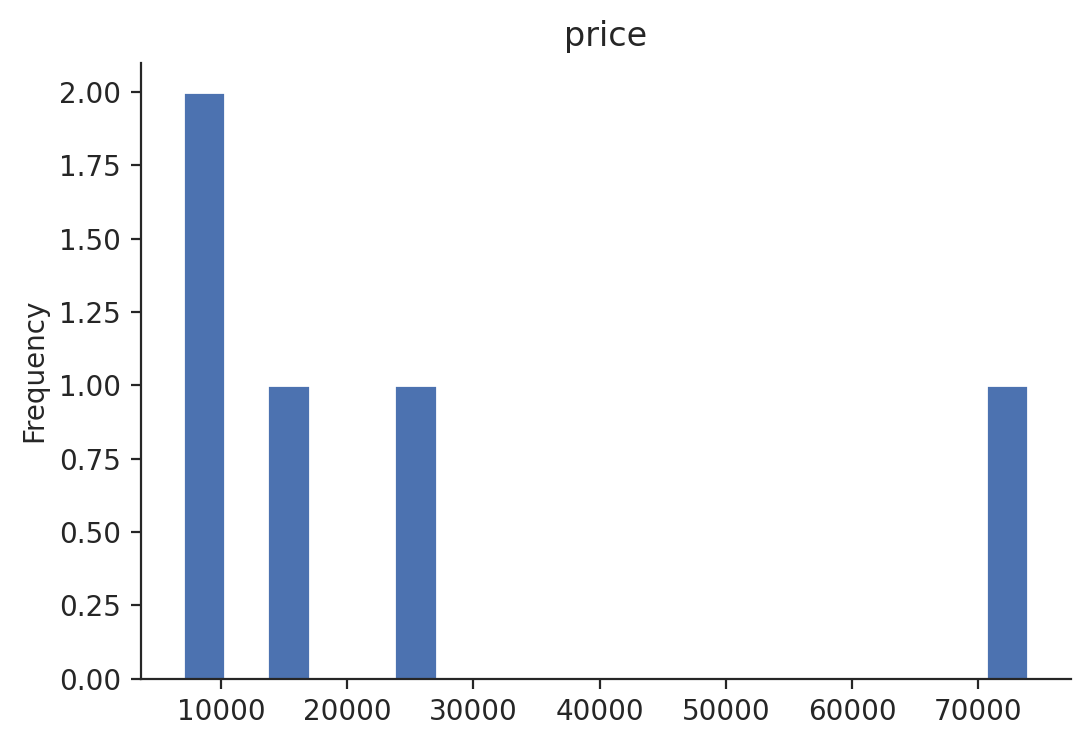

In [ ]:
_df_18['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pivot_table21 = new_ads1.pivot_table(values="price", index=["fuel_type", "standard_make"], aggfunc="median")
pivot_table21

price
fuel_type             standard_make                        
Bi Fuel               Bentley                       56990.0
                      Dacia                         14000.0
                      Honda                         10000.0
                      Mitsubishi                     1475.0
                      Proton                          988.0
                      Saab                           4500.0
                      Subaru                         3790.0
                      Toyota                         6999.0
                      Vauxhall                        695.0
                      Volvo                          2195.0
Diesel                Aixam                          6300.0
                      Alfa Romeo                     9490.0
                      Audi                          14990.0
                      BMW                           15000.0
                      Bentley                      101987.5
                      Cadillac                       1995.0
                      Chevrolet                      4200.0
                      Chrysler                       4292.5
                      Citroen                        7282.5
                      DS AUTOMOBILES                 9107.5
                      Dacia                          7397.5
                      Dodge                          3995.0
                      Fiat                           7327.0
                      Great Wall                     7722.5
                      Honda                          9500.0
                      Hyundai                       11495.0
                      Infiniti                      11292.5
                      Isuzu                         16100.0
                      Iveco                         15497.5
                      Jaguar                        17995.0
                      Jeep                          14000.0
                      Kia                           11990.0
                      Land Rover                    28500.0
                      Lexus                          2695.0
                      London Taxis International     2897.5
                      MG                             4422.0
                      MINI                           9290.0
                      Maserati                      31950.0
                      Mazda                         10690.0
                      Mercedes-Benz                 17399.0
                      Mitsubishi                    13989.0
                      Nissan                        10698.0
                      Peugeot                        7985.0
                      Porsche                       30000.0
                      Renault                        8750.0
                      Rover                          1495.0
                      SEAT                          11073.5
                      SKODA                         11892.5
                      Saab                           2992.5
                      Smart                          2999.0
                      SsangYong                     13970.0
                      Subaru                         9570.0
                      Suzuki                         6999.0
                      Toyota                         7485.0
                      Vauxhall                       7289.0
                      Volkswagen                    12299.0
                      Volvo                         14450.0
Diesel Hybrid         BMW                           39159.0
                      Citroen                        8297.0
                      Land Rover                    39982.5
                      Mercedes-Benz                 15740.0
                      Peugeot                        6789.0
                      Renault                       10550.0
                      Volvo                         44235.0
Diesel Plug-in Hybrid Audi                          31495.0
                      Mercedes-Ben

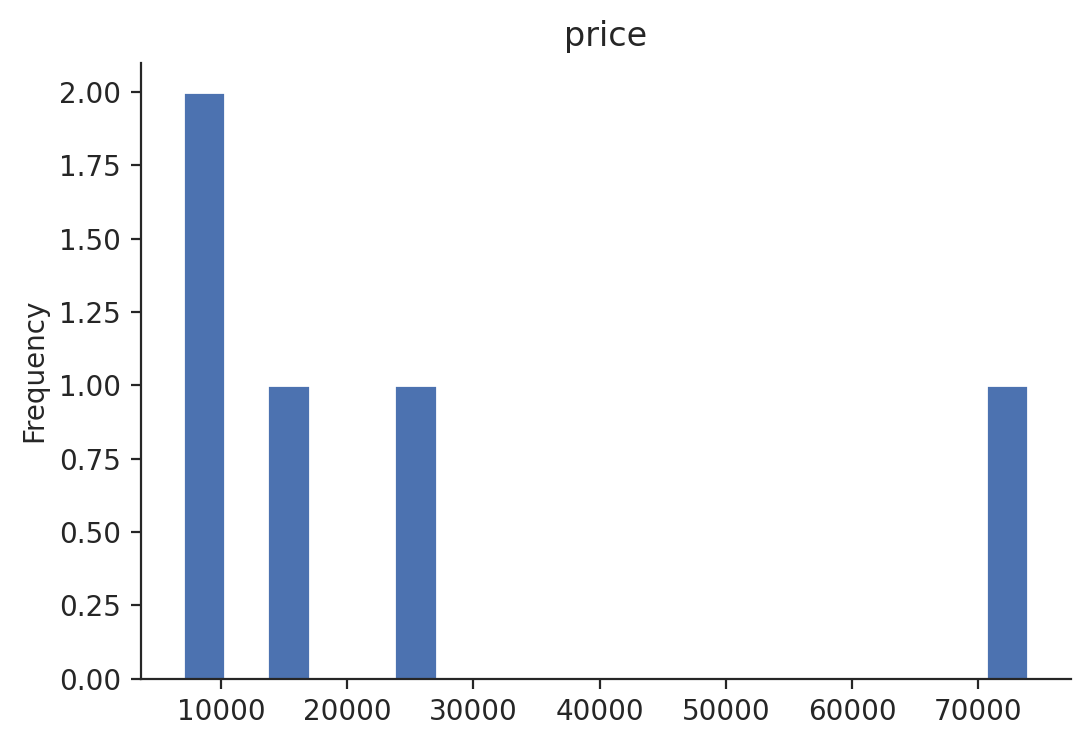

In [ ]:
_df_20['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)